In [1]:
import numpy as np
import pandas as pd
import pickle

import sys
sys.path.append("../")

from src.utils import utils
from src.data.load_raw_data import load_and_join_raw_data
from config.definitions import TRAIN_PATH

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# load all files from train folder
df, rating_2014, rating_2020 = load_and_join_raw_data(TRAIN_PATH)

Using Serbia server backend.


In [4]:
df.head()

,index,white,black,date,result,id,name,start_date,end_date,tours,time_control
0,tour_1,贾叶珍,范辰妮,2014-01-08,0.5,tournament_1_1,tournament_1,2014-01-08,2014-01-17,9,rapid
1,tour_1,吕亚光,李嘉爵,2014-01-08,0.5,tournament_1_2,tournament_1,2014-01-08,2014-01-17,9,rapid
2,tour_1,刘奇喜,刘晓鹏,2014-01-08,0.5,tournament_1_3,tournament_1,2014-01-08,2014-01-17,9,rapid
3,tour_1,陆桂姐,郑新聪,2014-01-08,1.0,tournament_1_4,tournament_1,2014-01-08,2014-01-17,9,rapid
4,tour_1,李汶玲,叶天英,2014-01-08,0.5,tournament_1_5,tournament_1,2014-01-08,2014-01-17,9,rapid


In [5]:
df_processed = df.pipe(utils.process_cols).pipe(utils.add_rating, **{'rating_2014':rating_2014, 'rating_2020':rating_2020})

In [6]:
TARGET = 'result'
DROP_COLS = ['index', 'white', 'black', 'date', 'id', 'name', 'start_date', 'end_date', 'time_control']
CATEGORICAL_PROCESSED = ['white_latin', 'black_latin']

In [7]:
df_processed.drop(DROP_COLS,axis=1).describe()

,result,tours,tour_round,tour_length_days,tour_days_passed,tour_game,time_control_rapid,white_game_n,black_game_n,white_rank_est,black_rank_est,rank_diff,white_rank_chg,black_rank_chg
count,174118.000000,174118.000000,174118.000000,174118.000000,174118.000000,174118.000000,174118.000000,174118.000000,174118.000000,174118.000000,174118.000000,174118.000000,174118.000000,174118.000000
mean,0.548826,10.164544,5.389529,11.955295,4.822873,140.251467,0.589405,3.054917,3.063916,751.009032,573.333039,177.675994,1.538460,58.508655
std,0.387581,2.043233,3.267901,9.204206,5.570416,100.027688,0.491943,1.649672,1.661364,978.376583,881.651560,829.939522,211.953916,202.683711
min,0.000000,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-2542.000000,-403.833333,-404.000000
25%,0.000000,9.000000,2.000000,0.000000,0.000000,57.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,10.000000,5.000000,12.000000,3.000000,124.000000,1.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,12.000000,8.000000,20.000000,8.000000,206.000000,1.000000,4.000000,4.000000,1606.000000,1181.500000,27.500000,4.166667,11.833333
max,1.000000,13.000000,13.000000,32.000000,30.000000,582.000000,1.000000,16.000000,17.000000,2623.333333,2626.666667,2623.333333,423.666667,444.666667


In [8]:
with open('../data/processed/df_processed.pickle', 'wb') as f:
    pickle.dump(df_processed, f)

variable:  tours
count    174118.000000
mean         10.164544
std           2.043233
min           4.000000
5%            7.000000
25%           9.000000
50%          10.000000
75%          12.000000
95%          13.000000
max          13.000000
Name: tours, dtype: float64


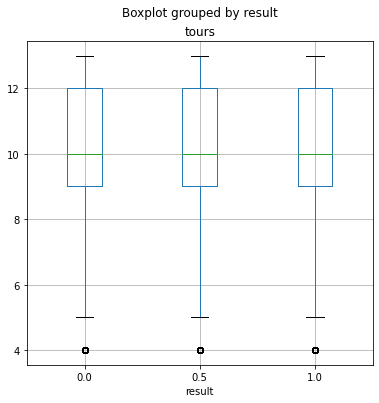

variable:  tour_round
count    174118.000000
mean          5.389529
std           3.267901
min           1.000000
5%            1.000000
25%           2.000000
50%           5.000000
75%           8.000000
95%          11.000000
max          13.000000
Name: tour_round, dtype: float64


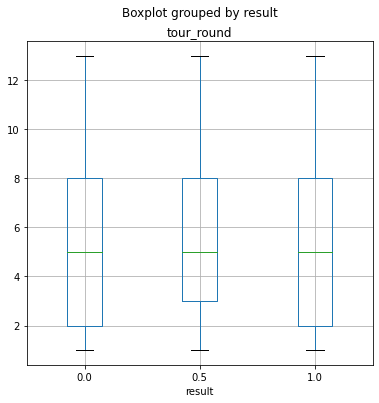

variable:  tour_length_days
count    174118.000000
mean         11.955295
std           9.204206
min           0.000000
5%            0.000000
25%           0.000000
50%          12.000000
75%          20.000000
95%          26.000000
max          32.000000
Name: tour_length_days, dtype: float64


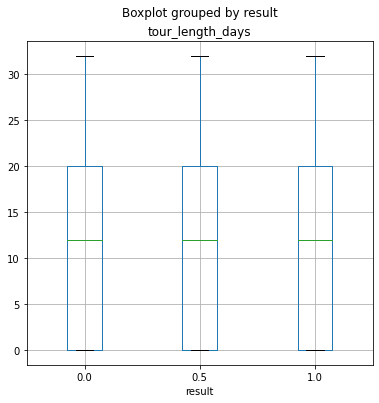

variable:  tour_days_passed
count    174118.000000
mean          4.822873
std           5.570416
min           0.000000
5%            0.000000
25%           0.000000
50%           3.000000
75%           8.000000
95%          16.000000
max          30.000000
Name: tour_days_passed, dtype: float64


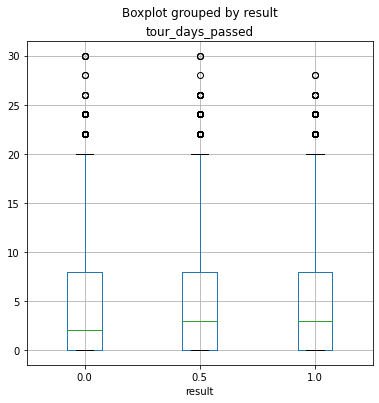

variable:  tour_game
count    174118.000000
mean        140.251467
std         100.027688
min           1.000000
5%           11.000000
25%          57.000000
50%         124.000000
75%         206.000000
95%         324.000000
max         582.000000
Name: tour_game, dtype: float64


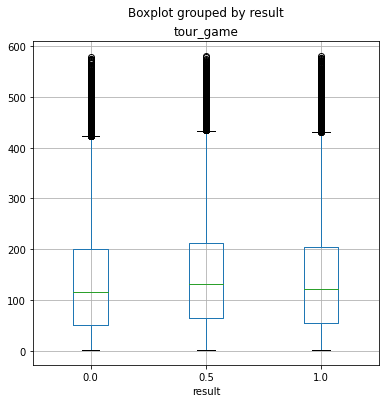

variable:  time_control_rapid
count    174118.000000
mean          0.589405
std           0.491943
min           0.000000
5%            0.000000
25%           0.000000
50%           1.000000
75%           1.000000
95%           1.000000
max           1.000000
Name: time_control_rapid, dtype: float64


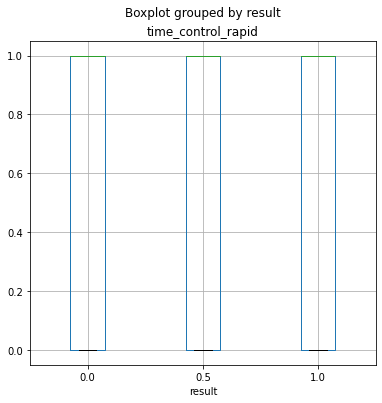

variable:  white_game_n
count    174118.000000
mean          3.054917
std           1.649672
min           1.000000
5%            1.000000
25%           2.000000
50%           3.000000
75%           4.000000
95%           6.000000
max          16.000000
Name: white_game_n, dtype: float64


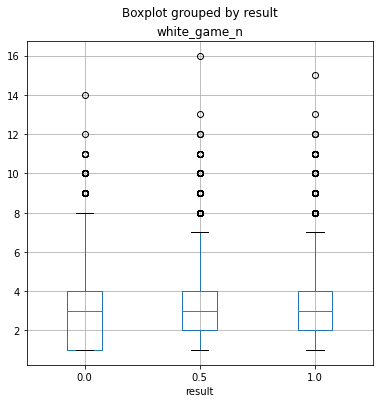

variable:  black_game_n
count    174118.000000
mean          3.063916
std           1.661364
min           1.000000
5%            1.000000
25%           2.000000
50%           3.000000
75%           4.000000
95%           6.000000
max          17.000000
Name: black_game_n, dtype: float64


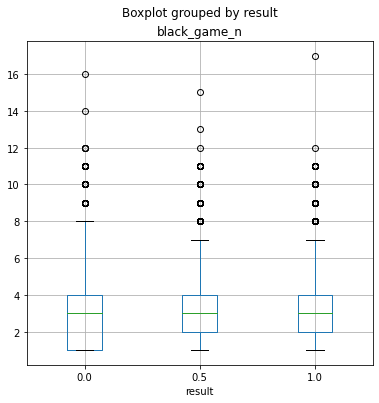

variable:  white_rank_est
count    174118.000000
mean        751.009032
std         978.376583
min           0.000000
5%            0.000000
25%           0.000000
50%           0.000000
75%        1606.000000
95%        2405.833333
max        2623.333333
Name: white_rank_est, dtype: float64


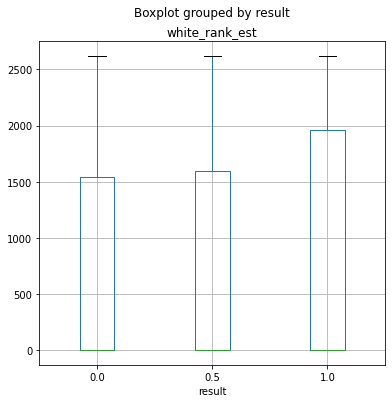

variable:  black_rank_est
count    174118.000000
mean        573.333039
std         881.651560
min           0.000000
5%            0.000000
25%           0.000000
50%           0.000000
75%        1181.500000
95%        2389.833333
max        2626.666667
Name: black_rank_est, dtype: float64


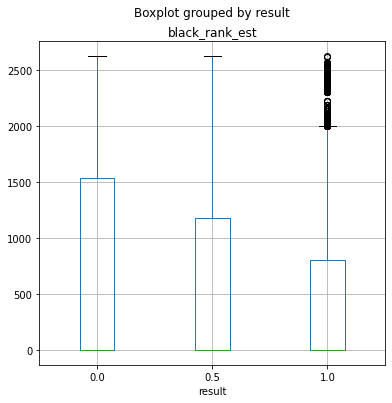

variable:  rank_diff
count    174118.000000
mean        177.675994
std         829.939522
min       -2542.000000
5%        -1194.000000
25%           0.000000
50%           0.000000
75%          27.500000
95%        2313.000000
max        2623.333333
Name: rank_diff, dtype: float64


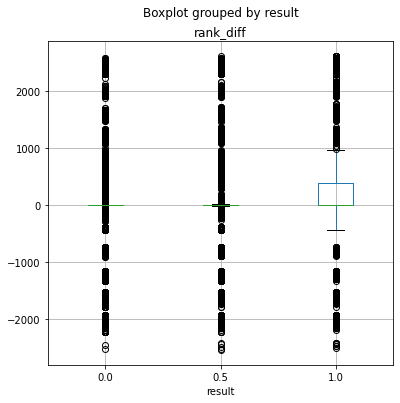

variable:  white_rank_chg
count    174118.000000
mean          1.538460
std         211.953916
min        -403.833333
5%         -397.166667
25%           0.000000
50%           0.000000
75%           4.166667
95%         396.666667
max         423.666667
Name: white_rank_chg, dtype: float64


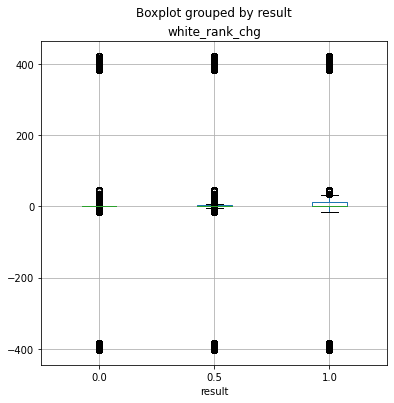

variable:  black_rank_chg
count    174118.000000
mean         58.508655
std         202.683711
min        -404.000000
5%         -389.500000
25%           0.000000
50%           0.000000
75%          11.833333
95%         405.000000
max         444.666667
Name: black_rank_chg, dtype: float64


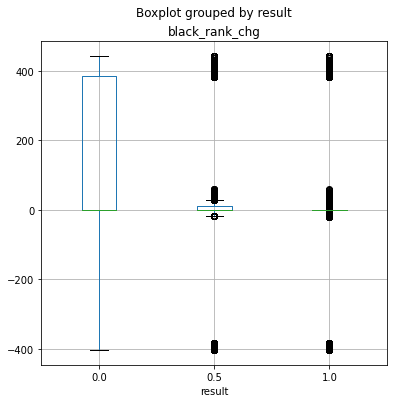

In [9]:
# 'tour_days_passed', 'white_rank_est', 'black_rank_est', 'white_rank_chg', 'black_rank_chg', 'rank_diff' seem to have some predictive power
utils.numeric_bar_plot(df_processed, TARGET, DROP_COLS)

In [10]:
# [['white_rank_est', 'black_rank_est', 'white_rank_chg', 'black_rank_chg', 'rank_diff', TARGET]]
# rank diff seem to be positively correlated with result - the larger the difference between white and black ranks - higher chance for white to win
df_processed.corr()['result']

result                1.000000
tours                 0.006358
tour_round            0.009062
tour_length_days     -0.001167
tour_days_passed      0.006182
tour_game             0.010246
time_control_rapid   -0.011185
white_game_n          0.011921
black_game_n          0.010031
white_rank_est        0.058833
black_rank_est       -0.061307
rank_diff             0.134482
white_rank_chg        0.089605
black_rank_chg       -0.088112
Name: result, dtype: float64

There are 13 numeric features in the dataset


<Figure size 864x360 with 0 Axes>

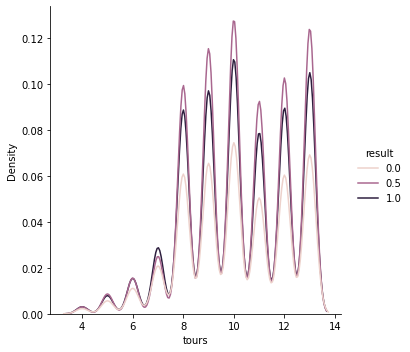

<Figure size 864x360 with 0 Axes>

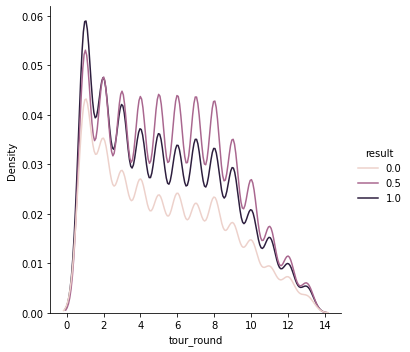

<Figure size 864x360 with 0 Axes>

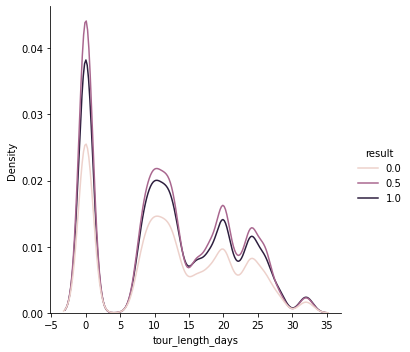

<Figure size 864x360 with 0 Axes>

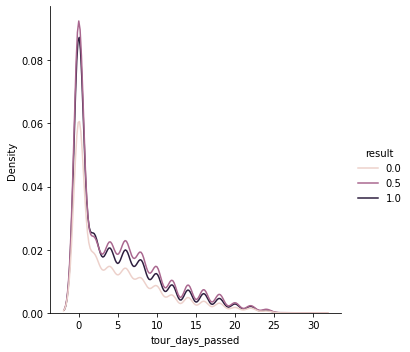

<Figure size 864x360 with 0 Axes>

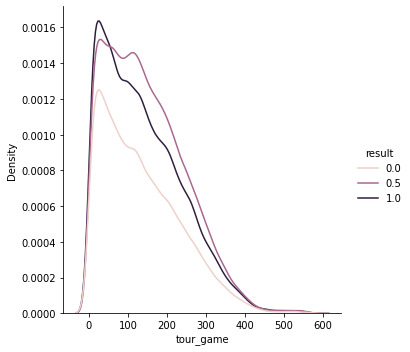

<Figure size 864x360 with 0 Axes>

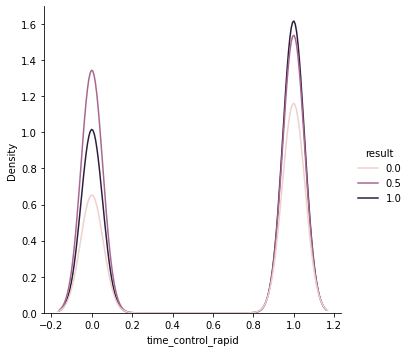

<Figure size 864x360 with 0 Axes>

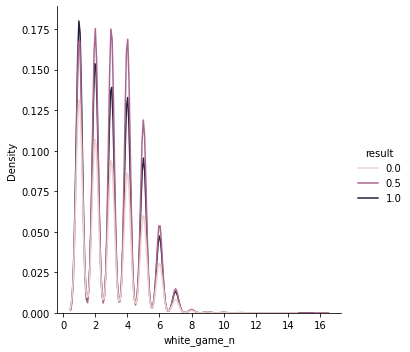

<Figure size 864x360 with 0 Axes>

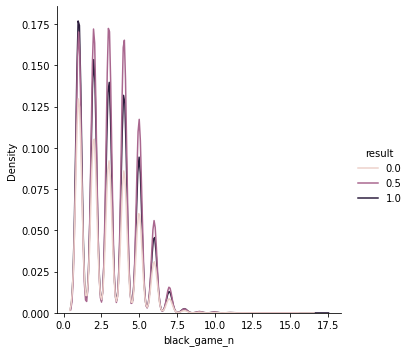

<Figure size 864x360 with 0 Axes>

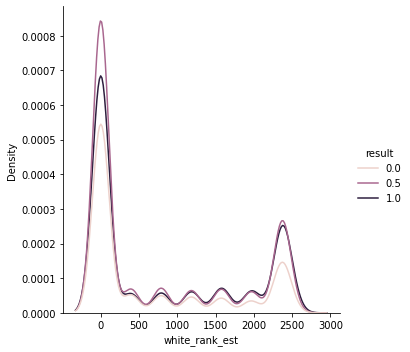

<Figure size 864x360 with 0 Axes>

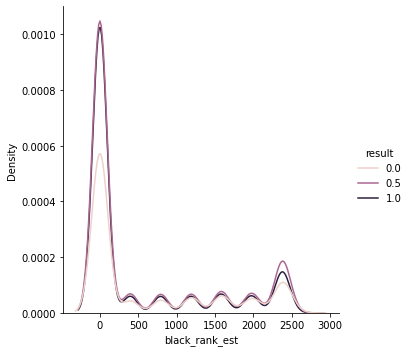

<Figure size 864x360 with 0 Axes>

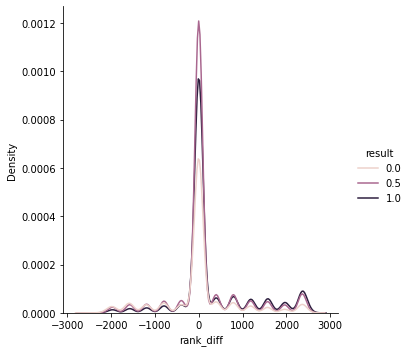

<Figure size 864x360 with 0 Axes>

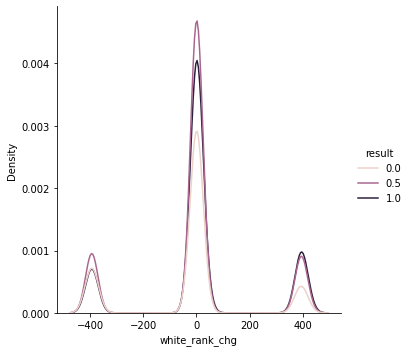

<Figure size 864x360 with 0 Axes>

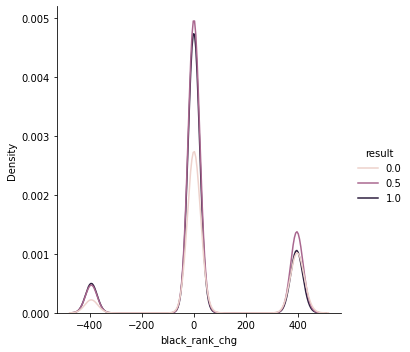

In [11]:
utils.numeric_distribution_plot(df_processed, TARGET, DROP_COLS)

In [12]:
corr = df_processed.corr()

In [14]:
corr[abs(corr['result'])>0.03]['result']

result            1.000000
white_rank_est    0.058833
black_rank_est   -0.061307
rank_diff         0.134482
white_rank_chg    0.089605
black_rank_chg   -0.088112
Name: result, dtype: float64

## Modeling step - in modeling_1.ipynb